## This notebook contains a comparison between typical neural network and residual network (ResNet) architectures. Comparison conducted with same data set and same number of hidden layers/neurons on hidden layers. Only difference is jump-over connections ResNet

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt

%matplotlib inline

# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Little bit of preprocessing

# Drop unneccesary columns
cols = [0,1,2,3]
df.drop(df.columns[cols],axis=1,inplace=True)

# Split Train-test

train = df.sample(frac=0.8)
test = df.drop(train.index)

# Split X and y for train
y_train = train.Exited.copy()
X_train = train.drop(['Exited'],axis=1).copy()

# Split X and y for test

y_test = test.Exited.copy()
X_test = test.drop(['Exited'],axis=1).copy()

# One-hot-encode X for train and test

X_train = pd.get_dummies(X_train,columns = ['Gender','Geography'],drop_first=True)
X_test = pd.get_dummies(X_test,columns = ['Gender','Geography'],drop_first=True)

# Normalize X for train and test
X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())

# Convert everything to torch tensor

X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

# Vanilla ANN Implementation

## Performance Evaluation Function (Typical train-test split)

In [5]:
def evaluate(model, y_train,y_pred,X_test,y_test):
    
    model.eval()
    
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred < 0.5] = 0
    
    ytr_pred = y_pred
    
    yte_pred = model(X_test)
    yte_pred[yte_pred > 0.5] = 1
    yte_pred[yte_pred < 0.5] = 0
    
    train_acc = 100 - ( ( torch.sum( torch.abs( ytr_pred - y_train ) ) / len(y_train) ) * 100 )
    test_acc = 100 - ( ( torch.sum( torch.abs( yte_pred - y_test ) ) / len(y_test) ) * 100 )
    
    return train_acc, test_acc    

## Vanilla ANN Implementation

In [6]:
# Constant random seed for reproducibility
torch.manual_seed(0)


# Model 4 hidden layers with 7 neurons each and all layers include batch normalizatin 
# to prevent vanishing gradient problem
model = nn.Sequential()


model.add_module('l1', nn.Linear(10,7))
model.add_module('bn1', nn.BatchNorm1d(7))
model.add_module('act1', nn.Sigmoid())

model.add_module('l2', nn.Linear(7,7))
model.add_module('bn2', nn.BatchNorm1d(7))
model.add_module('act2', nn.Sigmoid())

model.add_module('l3', nn.Linear(7,7))
model.add_module('bn3', nn.BatchNorm1d(7))
model.add_module('act3', nn.Sigmoid())

model.add_module('l4', nn.Linear(7,7))
model.add_module('bn4', nn.BatchNorm1d(7))
model.add_module('act4', nn.Sigmoid())

model.add_module('l5', nn.Linear(7,7))
model.add_module('bn5', nn.BatchNorm1d(7))
model.add_module('act5', nn.Sigmoid())

model.add_module('l6', nn.Linear(7,1))
model.add_module('act6', nn.Sigmoid())

# Binary cross entropy loss
loss_fun = nn.BCELoss()

# Adam optimizer with default beta values and alpha = 0.5
optimizer = optim.Adam(model.parameters(),lr=0.5)


train_acc = []
test_acc = []

# Training and evaluation loop

for i in range(1000):
    
    model.train()
    
    y_hat = model(X_train)
    
    cost = loss_fun(y_hat,y_train)
    
    optimizer.zero_grad()

    cost.backward()

    optimizer.step()
    
    print(cost)
    
    t_acc, te_acc = evaluate(model, y_train ,y_hat, X_test, y_test)
    
    train_acc.append(t_acc)
    
    test_acc.append(te_acc)


    

tensor(0.7300, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5412, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6530, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5640, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5010, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4733, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4799, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4930, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4933, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4790, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4620, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4542, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4535, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4530, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4508, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4508, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4481, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4400, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4334, grad_fn=<BinaryCrossEntropyBack

tensor(0.3275, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3273, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3274, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3286, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3313, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3289, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3289, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3286, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3263, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3290, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3309, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3314, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3296, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3303, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3278, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3285, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3271, grad_fn=<BinaryCrossEntropyBack

tensor(0.3167, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3156, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3211, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3192, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3175, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3167, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3162, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3160, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3149, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3148, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3147, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3141, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3154, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3164, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3145, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3144, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3176, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3148, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3155, grad_fn=<BinaryCrossEntropyBack

tensor(0.3078, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3094, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3077, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3104, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3175, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3163, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3164, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3150, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3128, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3148, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3133, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3127, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3137, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3119, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3123, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3116, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3121, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3103, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3116, grad_fn=<BinaryCrossEntropyBack

tensor(0.3077, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3067, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3076, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3064, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3060, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3068, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3057, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3056, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3044, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3038, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3041, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3044, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3052, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3181, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3168, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3182, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3143, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3178, grad_fn=<BinaryCrossEntropyBack

tensor(0.3050, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3053, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3046, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3047, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3074, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3066, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3039, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3064, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3144, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3111, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3076, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3105, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3060, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3076, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3067, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3065, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3087, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3077, grad_fn=<BinaryCrossEntropyBack

tensor(0.3035, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3020, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3034, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3011, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3021, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3024, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3015, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3053, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3035, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3054, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3033, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3023, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3056, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3066, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3076, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3089, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3057, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3058, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3038, grad_fn=<BinaryCrossEntropyBack

In [7]:
# Numeric train and test accuracies

print(te_acc) #Test Acc

print(t_acc) # Training Acc

tensor(85.1000, grad_fn=<RsubBackward1>)
tensor(87.0875, grad_fn=<RsubBackward1>)


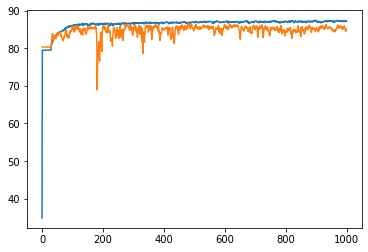

In [8]:
# Plot of train and test accuracy

import matplotlib.pyplot as plt


plt.plot(train_acc)
plt.plot(test_acc)

# Resnet Implementation

## Residual Connection Module

In [9]:
# Custom submodule of nn.Module of pytorch to implement residual connections

# This class contains batch-normalized two layers with sigmoid activation functions at the end

class ResCon(nn.Module):
    
    def __init__(self,n_i):
        
        super(ResCon,self).__init__()
        
        self.linear1 = nn.Linear(n_i,n_i)
        self.batch1 = nn.BatchNorm1d(n_i)
        self.linear2 = nn.Linear(n_i,n_i)
        self.batch2 = nn.BatchNorm1d(n_i)


    
    def forward(self,x):
        
        residual = x
        
        out =  self.linear1(x)
        out =  self.batch1(x)
        out =  torch.sigmoid(x)
        
        out =  self.linear2(x)
        out =  self.batch2(x)
        out =  torch.sigmoid(x)
        
        out = out + x
        
        return out

## Resnet Implementation

In [10]:
torch.manual_seed(0)

# Resnet implementation with same hidden layers, number of neurons and activation function as the vanilla NN implementation

model = nn.Sequential()


model.add_module('l1', nn.Linear(10,7))
model.add_module('bn1', nn.BatchNorm1d(7))
model.add_module('act1', nn.Sigmoid())

model.add_module('l2', ResCon(7))
model.add_module('l3', ResCon(7))

model.add_module('l11', nn.Linear(7,1))
model.add_module('act5', nn.Sigmoid())


loss_fun = nn.BCELoss()

optimizer = optim.Adam(model.parameters(),lr=0.5)



train_acc = []
test_acc = []

for i in range(1000):
    
    model.train()
    
    y_hat = model(X_train)
    
    cost = loss_fun(y_hat,y_train)
    
    optimizer.zero_grad()

    cost.backward()

    optimizer.step()
    
    print(cost)
    
    t_acc, te_acc = evaluate(model, y_train ,y_hat, X_test, y_test)
    
    train_acc.append(t_acc)
    
    test_acc.append(te_acc)


    

tensor(0.7236, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4393, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5345, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1851, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.7375, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4820, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.9178, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.8032, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4947, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5264, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6468, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.7100, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6960, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6196, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5186, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4665, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5281, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5981, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5456, grad_fn=<BinaryCrossEntropyBack

tensor(0.3504, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3502, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3501, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3499, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3498, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3497, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3496, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3494, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3493, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3491, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3489, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3488, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3486, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3484, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3483, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3482, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3481, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3480, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3479, grad_fn=<BinaryCrossEntropyBack

tensor(0.3406, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3404, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3402, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3400, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3398, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3397, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3395, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3394, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3392, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3391, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3390, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3389, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3388, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3387, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3387, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3386, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3385, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3385, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3384, grad_fn=<BinaryCrossEntropyBack

tensor(0.3355, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3355, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3354, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3354, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3353, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3353, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3352, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3352, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3352, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3352, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3351, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3351, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3351, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3351, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3351, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3350, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3350, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3350, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3350, grad_fn=<BinaryCrossEntropyBack

tensor(0.3293, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3289, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3289, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3292, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3296, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3294, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3291, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3288, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3287, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3289, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3291, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3291, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3289, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3287, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3286, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3287, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3288, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3288, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3288, grad_fn=<BinaryCrossEntropyBack

tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3278, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3279, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3281, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3284, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3293, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3305, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3333, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3349, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3383, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3341, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3303, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3278, grad_fn=<BinaryCrossEntropyBack

tensor(0.3278, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3279, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3278, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3277, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3275, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3274, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3274, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3274, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3275, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.3275, grad_fn=<BinaryCrossEntropyBackward>)


In [13]:
print(t_acc)
print(te_acc)

tensor(86.6000, grad_fn=<RsubBackward1>)
tensor(86.8000, grad_fn=<RsubBackward1>)


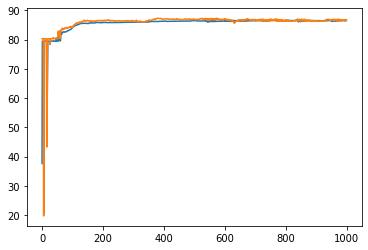

In [14]:
plt.plot(train_acc)
plt.plot(test_acc)

## Conclusion: Resnet is more stable and prevents overfitting for the same number of hidden layers and neurons